In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = ['25']  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = True)
print(data.head(10))

   label  Count  Percentage
0      0   2248        81.8
1      1    500        18.2
Size of train, val, test dataset: 1922 413 413
Percentage of train, val, test dataset: 69.9% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0    val
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1   test
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0    val


### Train with a Customized CNN 


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 56.29755 | Val Loss: 8.38281 | Train Acc: 0.696| Val Acc: 0.828
Epoch 02: | Train Loss: 14.47428 | Val Loss: 42.04546 | Train Acc: 0.793| Val Acc: 0.308
Epoch 03: | Train Loss: 8.41068 | Val Loss: 3.81240 | Train Acc: 0.826| Val Acc: 0.896
Epoch 04: | Train Loss: 5.04094 | Val Loss: 2.61381 | Train Acc: 0.864| Val Acc: 0.906
Epoch 05: | Train Loss: 2.92257 | Val Loss: 1.66102 | Train Acc: 0.869| Val Acc: 0.913
Epoch 06: | Train Loss: 1.70488 | Val Loss: 1.59883 | Train Acc: 0.882| Val Acc: 0.852
Epoch 07: | Train Loss: 1.57111 | Val Loss: 0.97093 | Train Acc: 0.880| Val Acc: 0.915
Epoch 08: | Train Loss: 1.15279 | Val Loss: 0.73871 | Train Acc: 0.871| Val Acc: 0.891
Epoch 09: | Train Loss: 0.72230 | Val Loss: 0.33048 | Train Acc: 0.887| Va

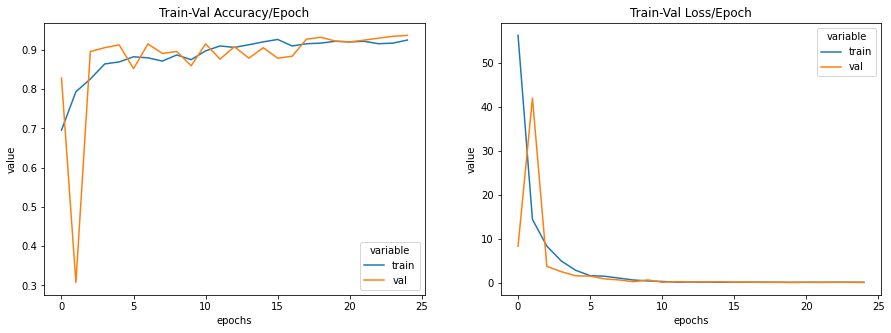

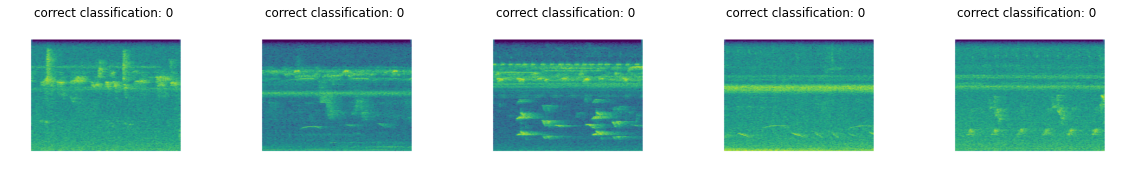

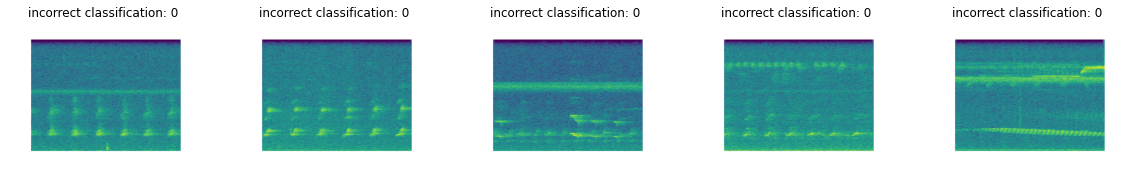

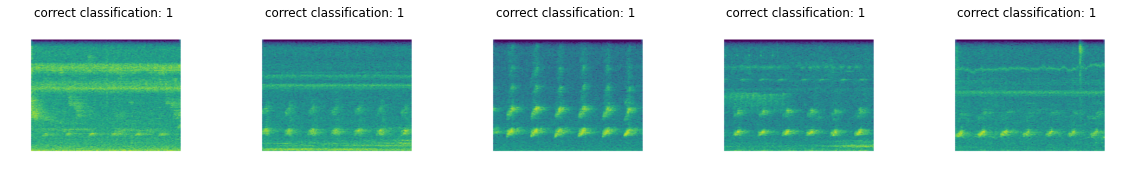

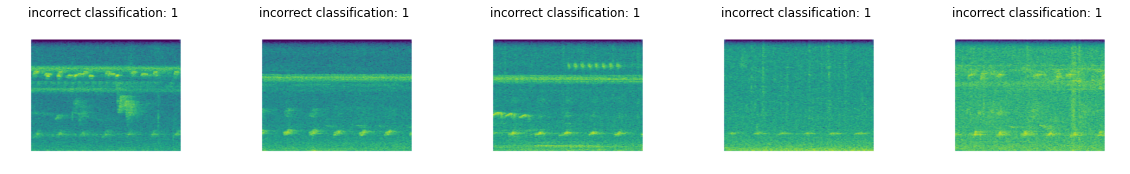

In [5]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Customized_CNN', 
                                                 batch_size = 32,  
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.008, 
                                                 lr_decay = False, 
                                                 num_epochs = 25)


### Fine-tune a pre-trained model


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.52309 | Val Loss: 0.13141 | Train Acc: 0.898| Val Acc: 0.947
Epoch 02: | Train Loss: 0.15164 | Val Loss: 0.13204 | Train Acc: 0.944| Val Acc: 0.954
Epoch 03: | Train Loss: 0.15493 | Val Loss: 0.13604 | Train Acc: 0.945| Val Acc: 0.939
Epoch 04: | Train Loss: 0.15718 | Val Loss: 0.13053 | Train Acc: 0.938| Val Acc: 0.947
Epoch 05: | Train Loss: 0.14991 | Val Loss: 0.13134 | Train Acc: 0.946| Val Acc: 0.956
Epoch 06: | Train Loss: 0.15075 | Val Loss: 0.13211 | Train Acc: 0.946| Val Acc: 0.952
Epoch 07: | Train Loss: 0.14681 | Val Loss: 0.13097 | Train Acc: 0.946| Val Acc: 0.952
Epoch 08: | Train Loss: 0.15330 | Val Loss: 0.13938 | Train Acc: 0.945| Val Acc: 0.954
Epoch 09: | Train Loss: 0.16029 | Val Loss: 0.13353 | Train Acc: 0.939| Val A

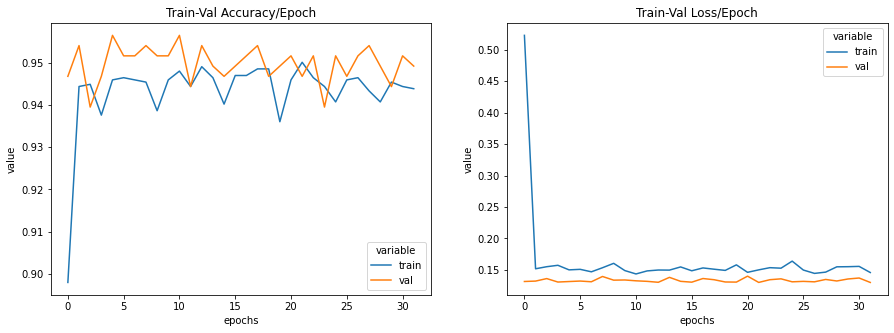

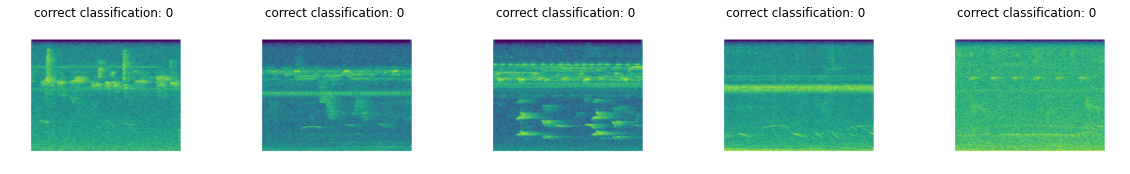

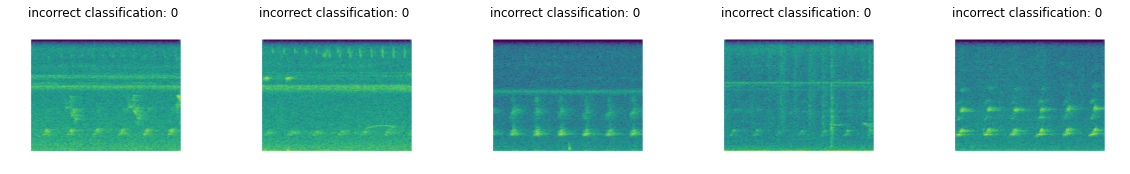

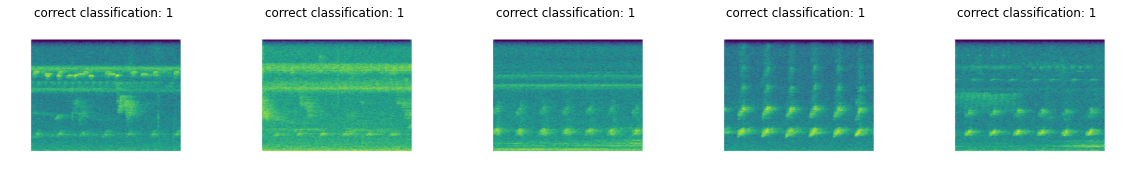

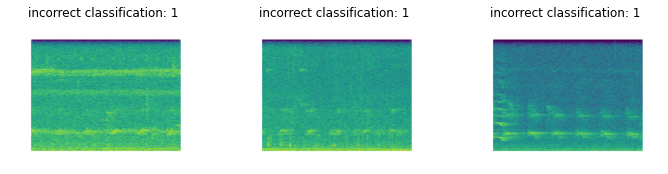

In [6]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet50', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.001, 
                                                 lr_decay = True, 
                                                 num_epochs = 32)